In [17]:
import scipy.io as sio
import numpy as np 
import sys 
from matplotlib import pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF

In [18]:
# #145 145 220
# def main():
#     # See https://rslab.ut.ac.ir/data for information about this dataset (Urban)
#     hs_image = sio.loadmat("data/Urban_R162.mat")
#     # print(type(hs_image))

#     # for key in hs_image:
#     #     print(key)

#     # Channels that are kept 
#     # print(hs_image["SlectBands"])

#     # Size of image 
#     # print(hs_image["nRow"])
#     # print(hs_image["nCol"])

#     # Number of wavelengths 
#     # print(hs_image["nBand"])

#     # Matrix itself 
#     # print(hs_image["Y"])

#     # Not sure what this mean 
#     # print(hs_image["maxValue"])

    
#     matrix = np.array(hs_image["Y"])

#     # Each row correspond to a channel/wavelength and the image is vectorized as a row vector (I am not sure how it is being flatten) 
#     # I am not sure what the value in the matrix mean. They range from 0 to 1000. I am guessing it is how much is captured by a particular channel after normalization  
#     print(matrix)

# main()

In [19]:
hs_image = sio.loadmat("data/Urban_R162.mat")
for key in hs_image:
    print(key)

print(hs_image["SlectBands"])

__header__
__version__
__globals__
SlectBands
nRow
nCol
nBand
Y
maxValue
[[  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [1

In [20]:
# for i in range(0,6):
#     fst_row = H[i]
#     fst_image = H[i].reshape((307, 307))

#     plt.imshow(fst_image, interpolation='nearest')
#     plt.show()

In [21]:
@jit(nopython=True, parallel=True)
def nmf_hs(X, delta, iters, components):
    (rows, cols) = X.shape
    A = np.random.rand(rows, components)
    S = np.random.rand(components, cols)
    all_delta_X = delta * np.ones((1, cols))
    all_delta_A = delta * np.ones((1, components))
    X_bar = np.vstack((X, all_delta_X))
    for _ in range(0, iters):
        A = A * (X @ np.transpose(S)) / (A @ S @ np.transpose(S))
        A_bar = np.vstack((A, all_delta_A))
        S = S * (np.transpose(A_bar) @ X_bar) / (np.transpose(A_bar) @ A_bar @ S)
        print(np.linalg.norm(X - A @ S))
    error = (np.linalg.norm(X - A @ S))
    return A, S, error 

In [22]:
hs_image = sio.loadmat("data/Urban_R162.mat")
X = np.array(hs_image["Y"]).astype(np.float64)

W, H, error = nmf_hs(X, 1000.0, 1000, 6)
error 

443331.4874192671
282645.493404249
260075.18469829208
250717.4467149169
245184.26198206627
241025.75737590762
237247.9515821013
233264.76866294598
228609.1653226215
222853.5943437421
215629.99645486684
206723.1579061658
196201.92043658928
184507.75349438365
172405.6109283558
160777.77721427602
150362.0516666455
141575.86628336986
134493.26403136674
128939.7626198596
124623.01544570626
121235.13068925662
118506.53472334325
116221.80296700442
114215.4217990598
112360.73664842773
110558.91761975271
108730.57534585471
106810.7002616426
104746.89977211543
102500.64385014151
100050.89393628201
97398.8600498023
94571.81564834797
91623.40790008414
88628.4606914217
85672.21725654491
82836.59481909836
80187.7106800833
77768.42795135795
75597.27233267225
73672.43289722814
71978.19398125025
70491.35917786293
69186.29897086493
68038.27895414253
67025.24957193268
66128.39118153712
65331.76828289176
64621.6023621337
63985.66769052548
63412.998678303666
62893.77892750113
62419.23067452611
61981.434831

27025.910525500414

In [23]:
np.ones((1, 6)) @ H

array([[0.9975694 , 0.99776427, 0.99719408, ..., 0.99813844, 0.99813048,
        0.99803901]])

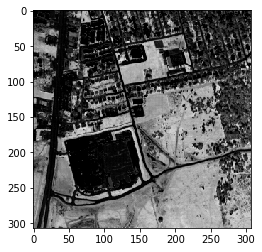

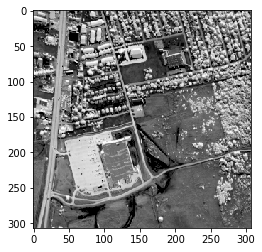

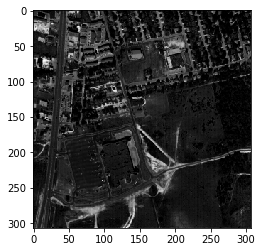

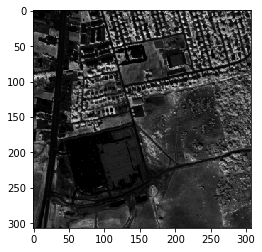

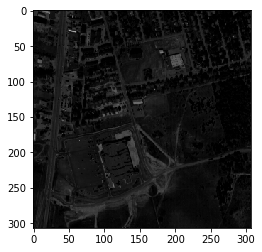

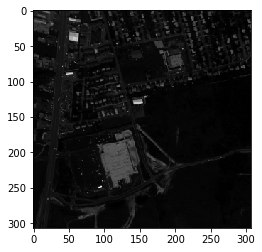

In [24]:
for i in range(0,6):
    fst_row = H[i]
    fst_image = H[i].reshape((307, 307))

    plt.imshow(fst_image, cmap='gray', interpolation='nearest')
    plt.show()

In [25]:
wavelength = hs_image["SlectBands"]

def radiation_expected(wavelength):
    return 3.8 * 10**8 / wavelength

def convertWToReflectivity(W):
    if(len(wavelength) != len(W)): return None
    newW = []

    for i in range(len(W)):
        newRow = []
        for j in range(len(W[i])):
            val =( W[i][j] / radiation_expected(wavelength[i])) * 100
            newRow += [val]
        newW += [newRow]

    newW = np.array(newW)[:,:,0]
    return newW

def plot_endmembers(W, n_comps, title="Endmembers"):
    W_t = W.transpose()
    bands = range(162)
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.xlabel("Bands")
    plt.ylabel("Reflectance")
    plt.title(title)
    for i in range(n_comps):
        plt.plot(bands, W_t[i], color = colors[i])
    plt.show()

(162, 6)
(162, 6)


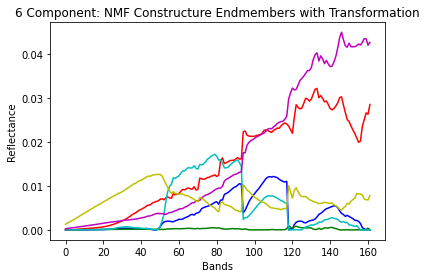

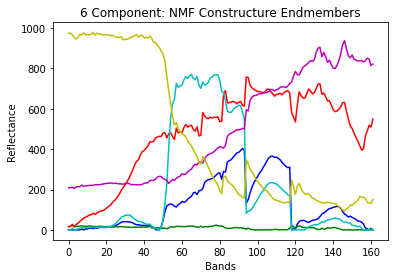

In [26]:
print(W.shape)

W_reflection = convertWToReflectivity(W)
# print(W_reflection)
print(W_reflection.shape)

plot_endmembers(W_reflection, 6, title="6 Component: NMF Constructure Endmembers with Transformation")
plot_endmembers(W, 6, title="6 Component: NMF Constructure Endmembers")



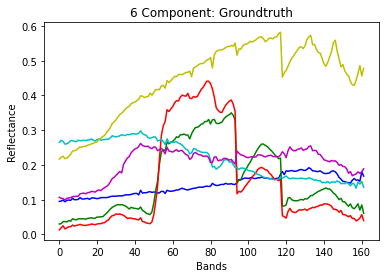

In [27]:
hs_image = sio.loadmat("data/groundTruth_Urban_end6/end6_groundTruth.mat")

W_gt6 = hs_image["M"]
plot_endmembers(W_gt6, 6, title="6 Component: Groundtruth")



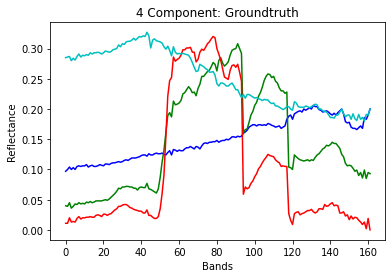

In [28]:
hs_image = sio.loadmat("data/groundTruth/end4_groundTruth.mat")

W_gt4 = hs_image["M"]
plot_endmembers(W_gt4, 4, title="4 Component: Groundtruth")


In [29]:
rms = mean_squared_error(W_gt6, W_reflection, squared=False)
rms

0.23089758344540368